## **SmartVisa: An Intelligent System for Predicting US Visa Approvals.**


### **Project Life Cycle**

![Description](https://research.aimultiple.com/wp-content/uploads/2020/01/machine-learning-life-cycle.png)


## **About**
The United States allows foreign workers to enter the country for employment on a temporary or permanent basis under specific legal provisions. These regulations aim to balance workforce needs by addressing labor shortages while safeguarding domestic workers from potential adverse impacts. The programs overseeing foreign labor certification are managed by the Office of Foreign Labor Certification (OFLC).  




### **Problem Statement**  

- The OFLC processes job certification applications for employers seeking to employ foreign workers in the United States and decides on their certification status.  
- Due to a significant increase in applications last year, the OFLC requires a machine learning solution to streamline the visa approval process by analyzing historical data.

**This project aims to develop a classification model that will:**  
- Predict whether a visa application will be approved or denied based on historical data.  
- Assist in identifying suitable profiles by evaluating key factors influencing visa approval decisions.  

The model will provide insights that help recommend which applicants meet the necessary criteria for certification, improving the efficiency and fairness of the decision-making process.  


##  **Data Collection.**
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

###  Importing the  Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Importing the CSV Data as Pandas DataFrame**

In [2]:
df=pd.read_csv(r'usa_visadataset.csv')

**Show Top 5 Records**

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Show Bottom 5 Records**

In [4]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Showing 5 Random Records**

In [5]:
df.sample(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
4221,EZYV4222,Asia,High School,Y,N,704,2013,West,68322.48,Year,Y,Denied
7419,EZYV7420,Asia,Master's,N,N,2752,2003,Northeast,83243.65,Year,Y,Certified
9884,EZYV9885,Europe,Bachelor's,Y,N,984,1892,South,20643.70,Year,Y,Certified
21233,EZYV21234,Europe,Bachelor's,N,Y,746,2011,South,25237.95,Year,Y,Certified
8013,EZYV8014,Asia,Bachelor's,N,N,293,2005,Midwest,157243.55,Year,Y,Certified


**Shape of the dataset**

In [6]:
df.shape

(25480, 12)

**Summary of the dataset**

In [7]:
# Display summary statistics of the dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Checking the Datatypes in the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Checking Missing Values in the dataset**

In [9]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There is no missing values in the dataset.

##  **Exploring The Data**

In [10]:
Numeric_features=[column for column in df.columns if df[column].dtype!='O']

Categorical_features=[column for column in df.columns if df[column].dtype=='O']

print(f"Number of Numerical Features: {len(Numeric_features)}")
print(f"Numerical Features are : {Numeric_features}")
print(f"Number of Categorical Features: {len(Categorical_features)}")
print(f"Categorical Features are : {Categorical_features}")

Number of Numerical Features: 3
Numerical Features are : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Number of Categorical Features: 9
Categorical Features are : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [11]:
# proportion of count of data values in each categorical column
for column in Categorical_features:
    print(df[column].value_counts(normalize=True) * 100)
    print('------------------------------------------')

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---

### **Insights**
- **`case_id`**: This column has unique values for each entry and does not provide any meaningful information for analysis. It can be dropped.  
- **`continent`**: The data is highly biased towards Asia. Other categories can be combined into a single category to simplify the analysis.  
- **`unit_of_wage`**: This column appears to be significant since most of the contracts are yearly, indicating its importance for predictions.



### **Univariate Analysis-Numerical Feature**

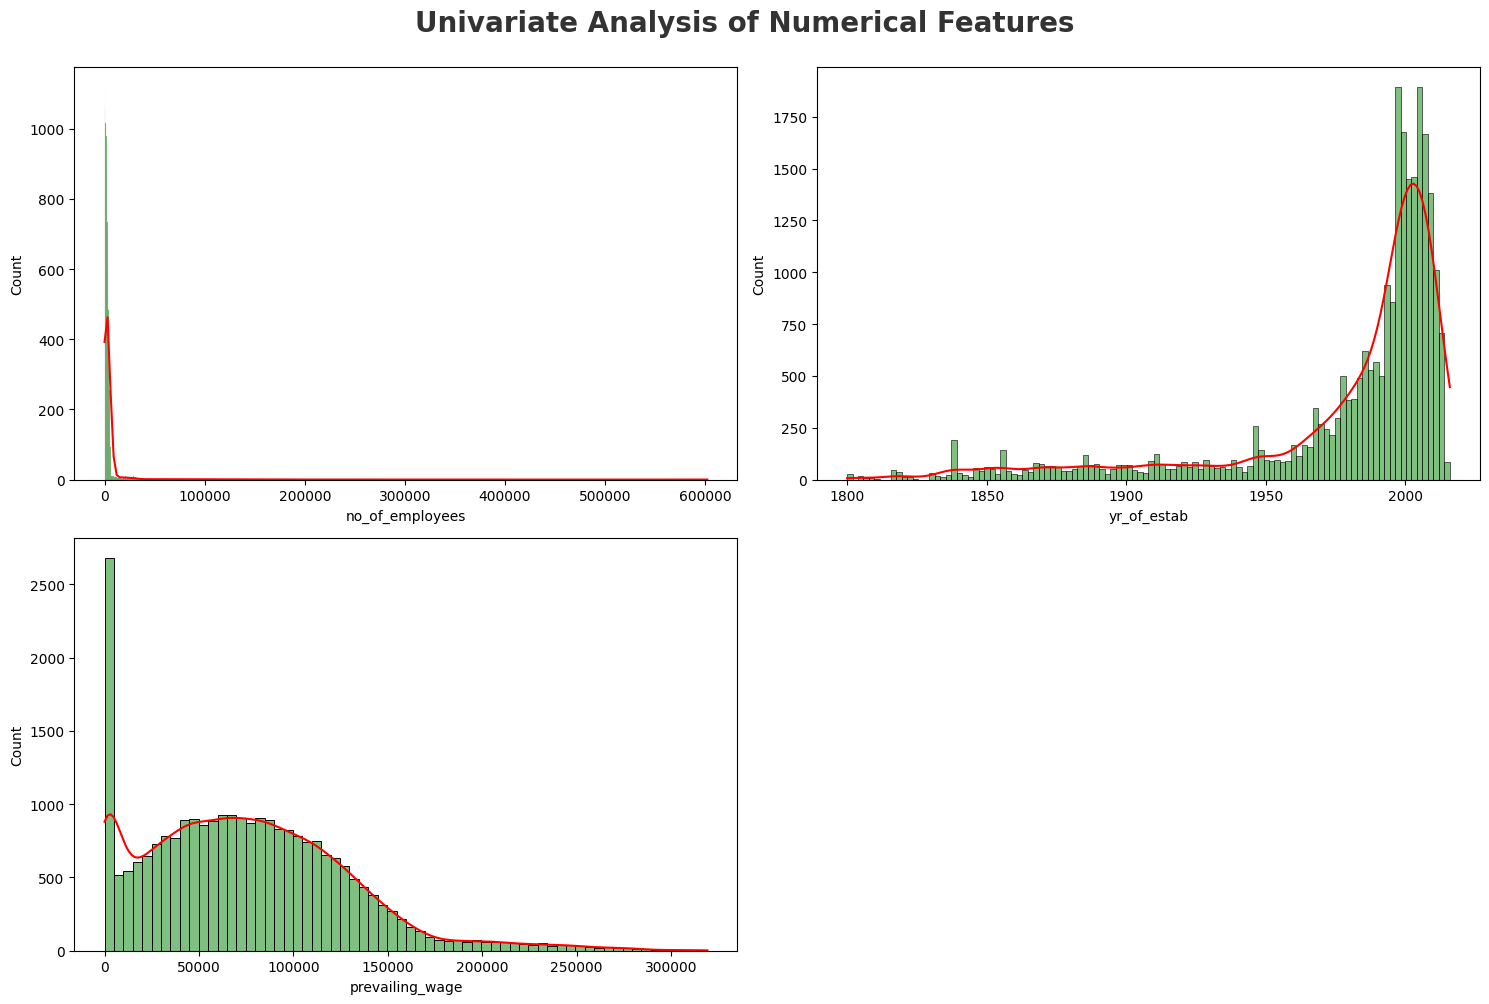

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(Numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[Numeric_features[i]], color='Green', kde=True)
    plt.xlabel(Numeric_features[i])
    
    # Customizing KDE color after plotting
    kde_curve = plt.gca().lines[-1]  # Get the most recent line (KDE curve)
    kde_curve.set_color('Red')  # Change its color to red

    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Num.png')


### Insights 

 **`No. of Employees`**:

- The distribution is highly skewed to the right, indicating that most businesses have a relatively small number of employees.
- A few companies have an unusually large number of employees, making them outliers in the dataset.

 **`Year of Establishment (yr_of_estab)`**:

- The majority of companies were established after the 1950s, with a significant increase observed in recent decades.
- This trend may reflect industrialization and modernization trends in recent years.

 **`Prevailing Wage`**:


- The distribution is also heavily right-skewed, with most wages concentrated in the lower range.
- A small number of applications show exceptionally high wages, which could represent senior-level or specialized roles.


### **Univariate Analysis-Categorical Feature**

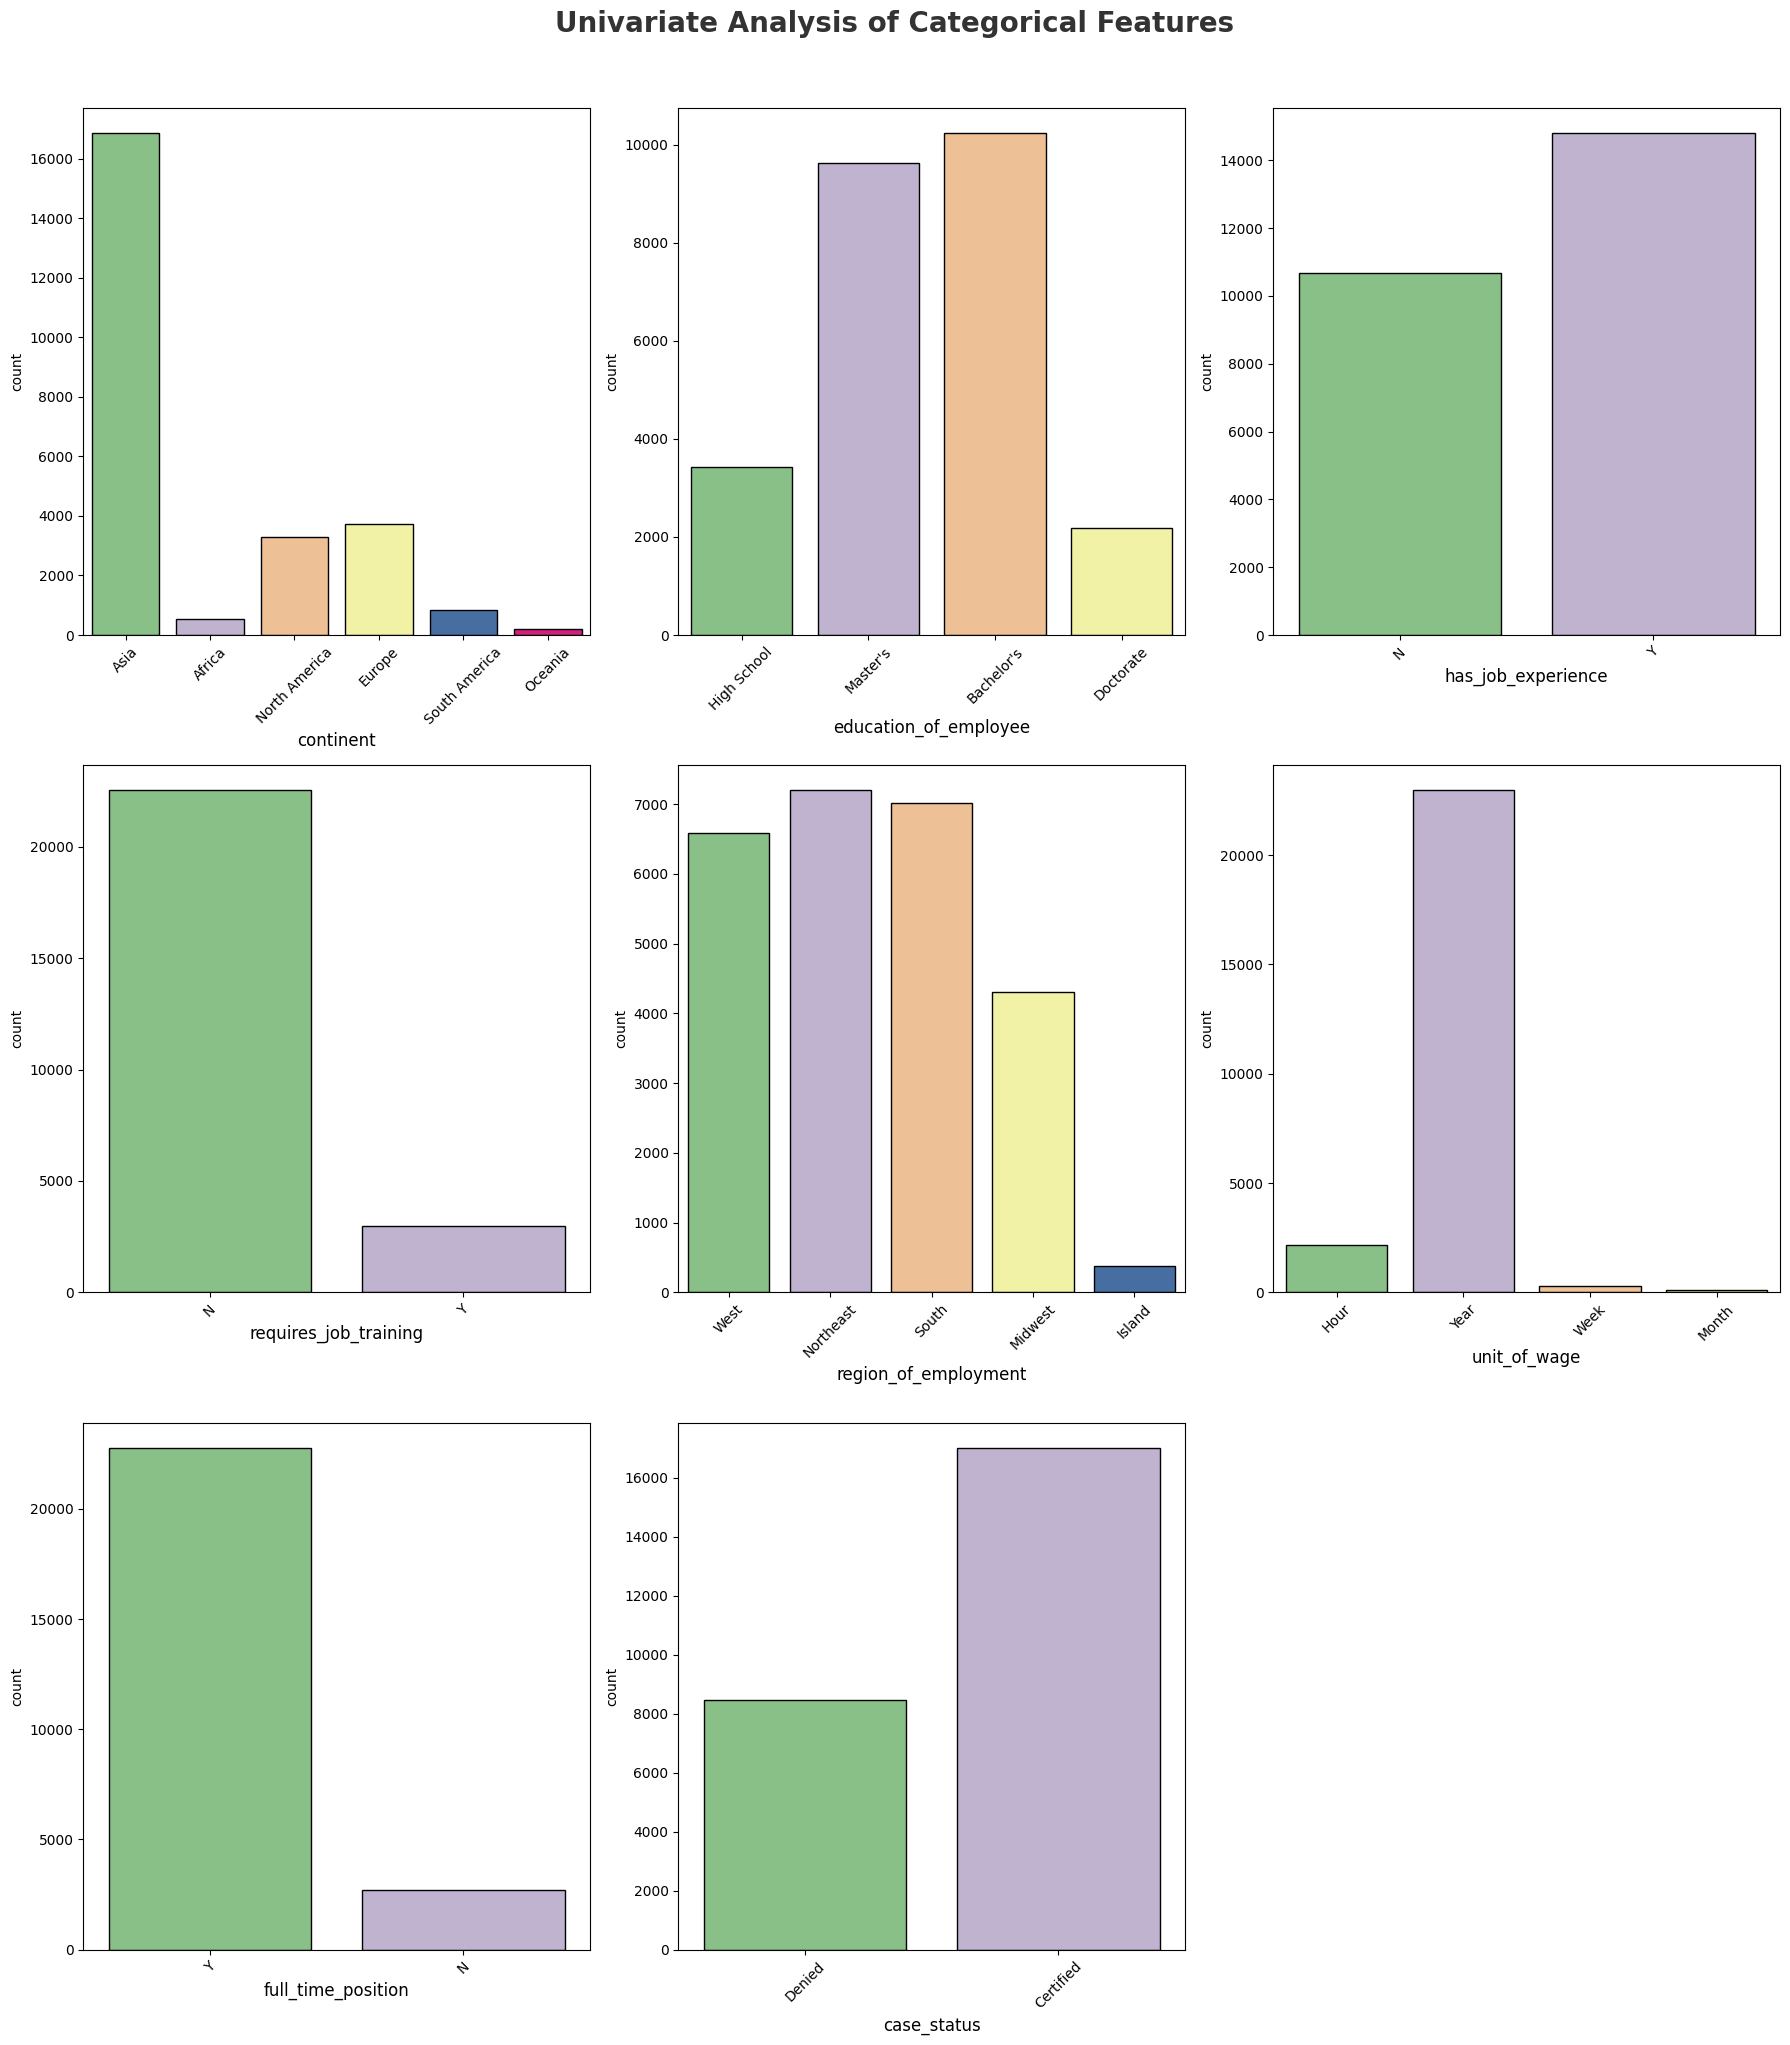

In [13]:
# Remove 'case_id' if it exists in the list
if 'case_id' in Categorical_features:
    Categorical_features.remove('case_id')

# Set figure size
plt.figure(figsize=(18, 20))

# Add a title
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Loop through categorical features
for i in range(len(Categorical_features)):
    plt.subplot(3, 3, i+1)  # Adjust subplot grid size as needed
    sns.countplot(data=df, x=Categorical_features[i], ec='k', palette='Accent')
    plt.xlabel(Categorical_features[i], fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-ticks if labels are long
    plt.tight_layout()

# Optional: Save the plot
# plt.savefig('./images/Univariate_Cat.png')

plt.show()


### Insights

1. **Geographical Concentration**: There is a significant geographical concentration in Asia, highlighting a regional dominance in the dataset.
2. **Educational Background**: A majority of candidates hold higher education degrees, with Bachelor's and Master's degrees being the most prevalent.
3. **Experience Preference**: The dataset shows a clear preference for candidates with substantial work experience.
4. **Employment Type**: The majority of positions are full-time, indicating a stable employment trend.
5. **Certification Rate**: A high percentage of candidates possess relevant certifications, demonstrating the importance of specialized qualifications.
6. **Wage Structure**: The annual wage structure is the most common, suggesting its widespread adoption across industries.


### **Multivariate Analysis**

In [14]:
discrete_features=[feature for feature in Numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in Numeric_features if len(df[feature].unique()) > 25]

print(f'We have {len(discrete_features)} discrete features : {discrete_features}')
print(f'\nWe have {len(continuous_features)} continuous_features : {continuous_features}')

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### **Checking the Multicollinearity in Numerical features**

In [15]:
df[Numeric_features].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


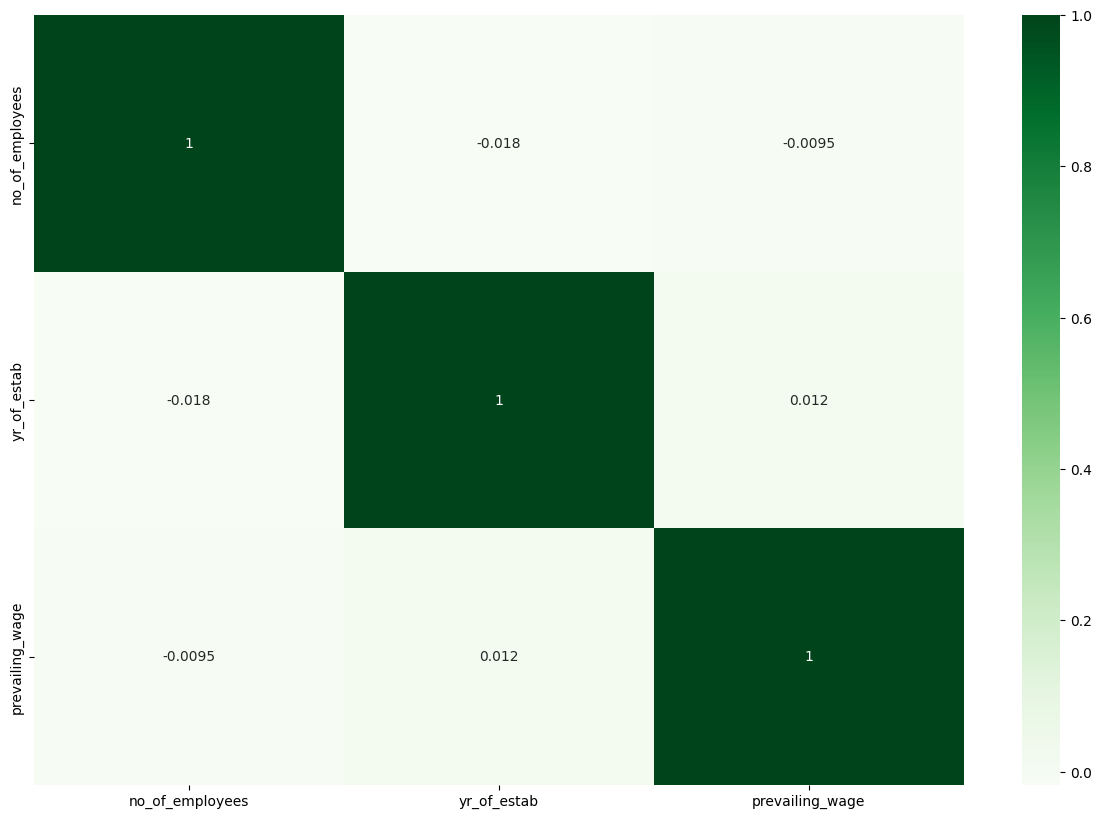

In [16]:
df1=df.copy()
plt.figure(figsize = (15,10))
sns.heatmap(df[Numeric_features].corr(), cmap="Greens", annot=True)
plt.show()

### Insights from the Correlation Matrix

- **No. of Employees**:
  - Has a **perfect correlation (1.000)** with itself, as expected.
  - Shows a **weak negative correlation (-0.017770)** with the year of establishment (`yr_of_estab`), indicating that the number of employees is not significantly influenced by the establishment year.
  - Exhibits a **very weak negative correlation (-0.009523)** with prevailing wage, suggesting minimal or no relationship.

- **Year of Establishment (`yr_of_estab`)**:
  - Displays a **weak positive correlation (0.012342)** with prevailing wage, implying a slight tendency for newer companies to offer higher wages, though the relationship is negligible.

- **Prevailing Wage**:
  - Shows **minimal correlation with both other features** (`no_of_employees`: -0.009523, `yr_of_estab`: 0.012342), indicating that wages are not strongly linked to the number of employees or the establishment year.

### Key Takeaways
- The correlations between the features are extremely weak, indicating **no strong linear relationships**.
- This suggests that each feature captures largely independent information, which can be useful for modeling without significant concerns of multicollinearity.


### **Checking the Multicollinearity in Categorical features**

#### **Hypothesis Testing for Categorical Variables**

Hypothesis testing, such as the **Chi-Square test of independence**, is used to evaluate whether two categorical variables are significantly associated or independent. It is particularly useful for assessing the correlation or dependency between categorical variables because:

---

#### Nature of Categorical Data
- **Categorical Data** represents groupings or categories (e.g., `case_status`, `gender`), where traditional correlation measures (like Pearson's correlation) are not applicable.
- The **Chi-Square test** examines the relationship between categories using contingency tables.

---

#### Hypothesis Testing Framework
1. **Null Hypothesis (H₀)**: The variables are independent (no association).
2. **Alternative Hypothesis (H₁)**: The variables are dependent (there is an association).

- The **p-value** determines whether to reject the null hypothesis:
- If the p-value is less than a chosen significance level (commonly 0.05), it suggests a significant association between the variables.


In [17]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in Categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[Categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


### Insights from Hypothesis Testing Results

The hypothesis testing results provide a clear picture of which categorical variables are significantly associated with the target variable. Here are the insights:

---

#### **Significant Associations (Reject Null Hypothesis)**:
1. **Continent**:
   - There is a significant relationship between the continent of the employee and the target variable. Geographic factors might influence trends like visa approvals or employment opportunities.

2. **Education of Employee**:
   - Employee education level is significantly associated with the target. Higher education may increase the likelihood of achieving desired outcomes, such as job offers or visa approvals.

3. **Has Job Experience**:
   - Prior job experience significantly impacts the target variable. Experienced candidates may be more favorable for approvals or specific employment types.

4. **Region of Employment**:
   - The region where employment is located shows a significant association. This may reflect regional hiring preferences or labor market conditions.

5. **Unit of Wage**:
   - The wage structure (e.g., hourly, yearly) is significantly linked to the target. This could indicate preferences for specific wage types in certain job applications.

6. **Full-Time Position**:
   - Full-time employment status has a strong association with the target. Employers might prefer full-time roles over part-time roles for certain positions.

7. **Case Status**:
   - The outcome of the case (e.g., approval or denial) is significantly related to other factors, as expected.

---

#### **No Significant Association (Fail to Reject Null Hypothesis)**:
1. **Requires Job Training**:
   - Job training requirements do not show a significant association with the target. This might suggest that training is not a critical factor in determining outcomes like approvals or employment.

---

### Overall Implications:
- The majority of variables are significantly associated with the target variable, indicating their potential importance in predictive modeling or decision-making.
- **Requires Job Training** stands out as the only variable with no significant relationship, suggesting it may have limited impact and could be excluded or given lower priority during feature selection.




In [18]:
continuous_numerical_features=[feature for feature in Numeric_features if len(df[feature].unique())>=10]
print(f"Continuous_numerical_features are : {continuous_numerical_features}")

Continuous_numerical_features are : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


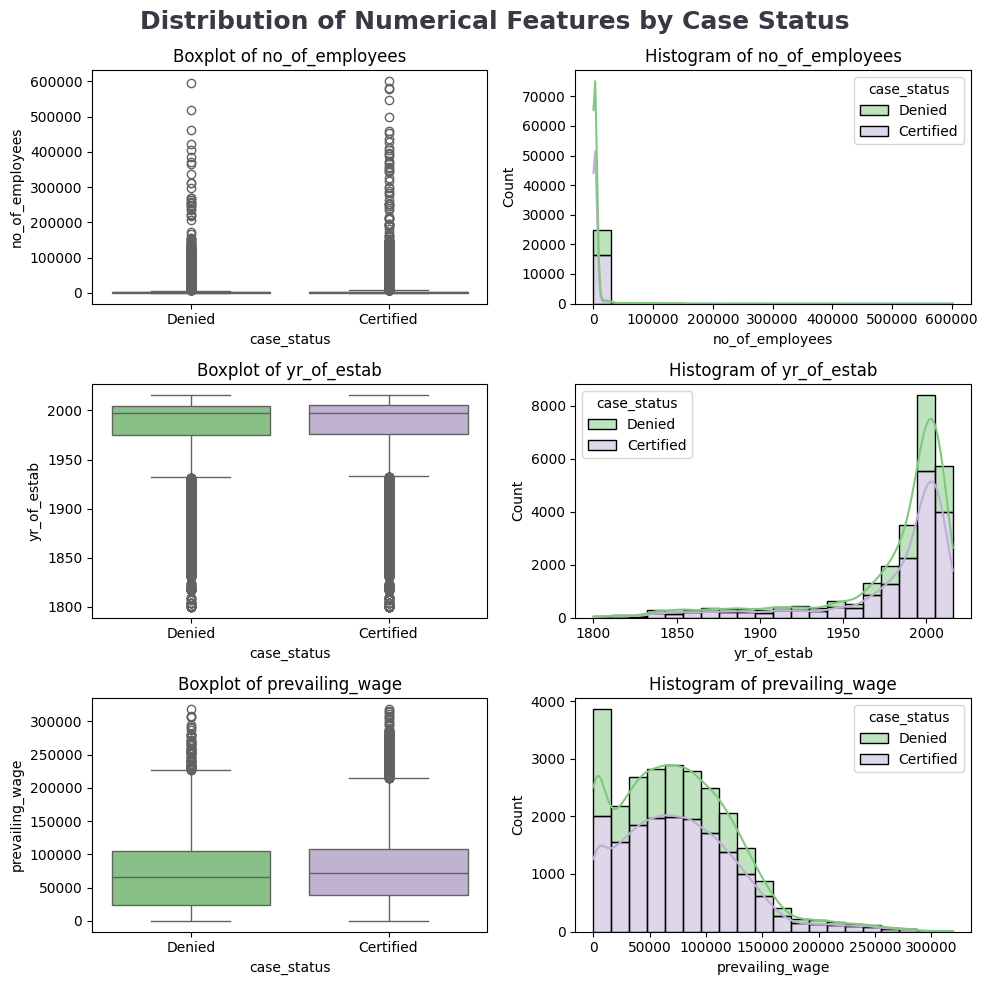

In [19]:
# Define color palette
clr1 = ['#1E90FF', '#DC143C']

# Create a figure and axes for subplots
fig, ax = plt.subplots(len(continuous_numerical_features), 2, figsize=(10,10))


fig.suptitle('Distribution of Numerical Features by Case Status', 
             color='#3C3744', fontsize=18, fontweight='bold', ha='center')


for i, col in enumerate(continuous_numerical_features):
    
    sns.boxplot(data=df, x='case_status', y=col,palette='Accent', ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)

   
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette='Accent', ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.92)

# Optional: Save the plot to a file
# plt.savefig('images/multivariate_num.png')


plt.show()


## **Initial Analysis Report**

* **No of Employees** has many outliers, which can be handled in feature engineering. The `no_of_employees` feature is right-skewed.
* **`yr_of_estab`** is left-skewed, with some outliers below the lower bound of the box plot.
* **`prevailing_wage`** is right-skewed, with outliers above the upper bound of the box plot.
* There are **no missing values** in the dataset.
* The **`case_id`** column can be deleted since each row has unique values.
* The **`case_status`** column is the target variable to predict.
* In the **categorical columns**, features can be encoded into binary numerical values through feature encoding.


## **Visualization**

### Visualization of the Target Feature

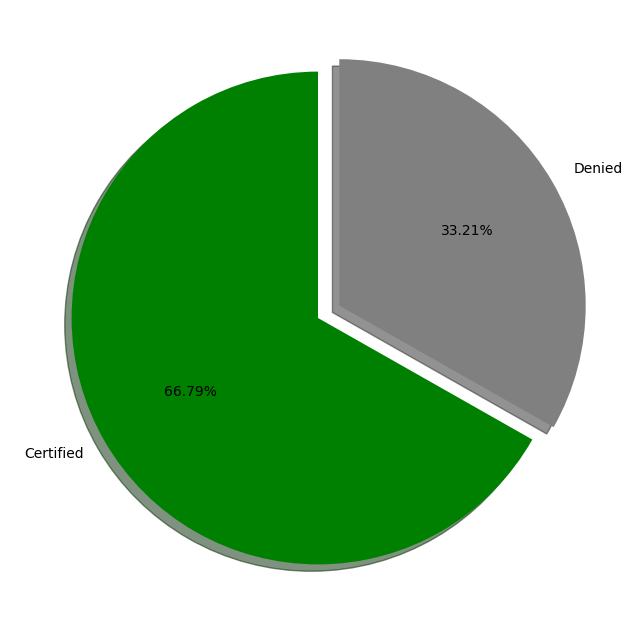

In [20]:
percentage = df['case_status'].value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['Green','Grey']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

#### Does the Applicant's Continent Influence Visa Status?

In [21]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

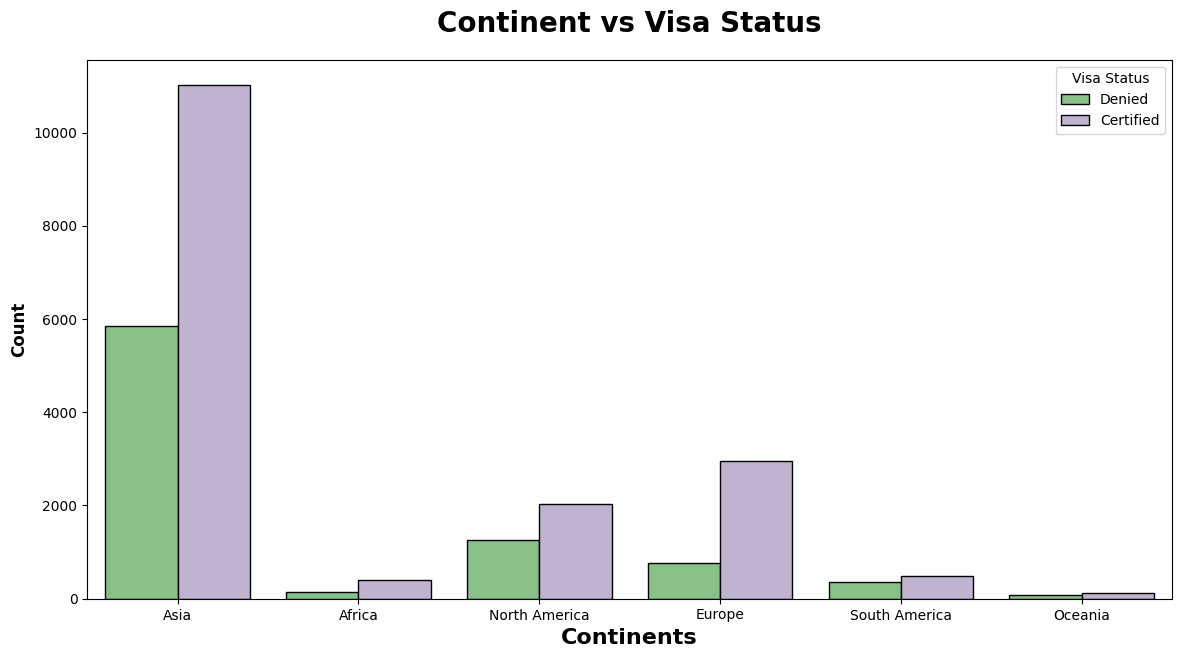

In [22]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [23]:
df2 = df.copy()
df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()


continent
Asia             11012
Europe            2957
North America     2037
South America      493
Africa             397
Oceania            122
Name: count, dtype: int64

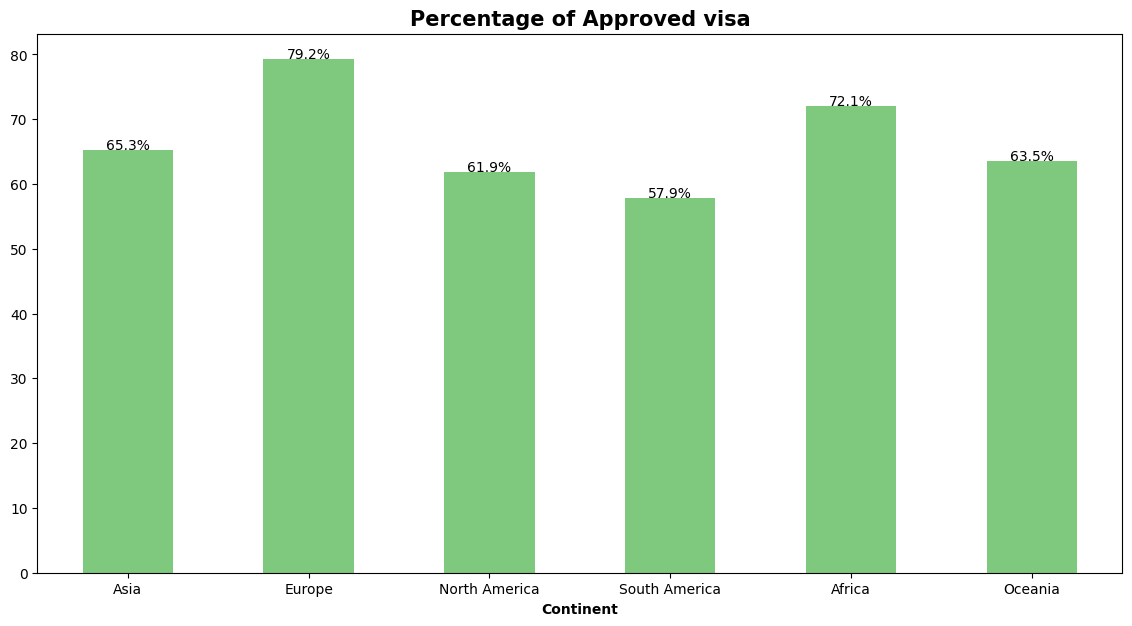

In [24]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Approved visa" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


#### **Does the Applicant's Education Level Affect Visa Status?**

In [25]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

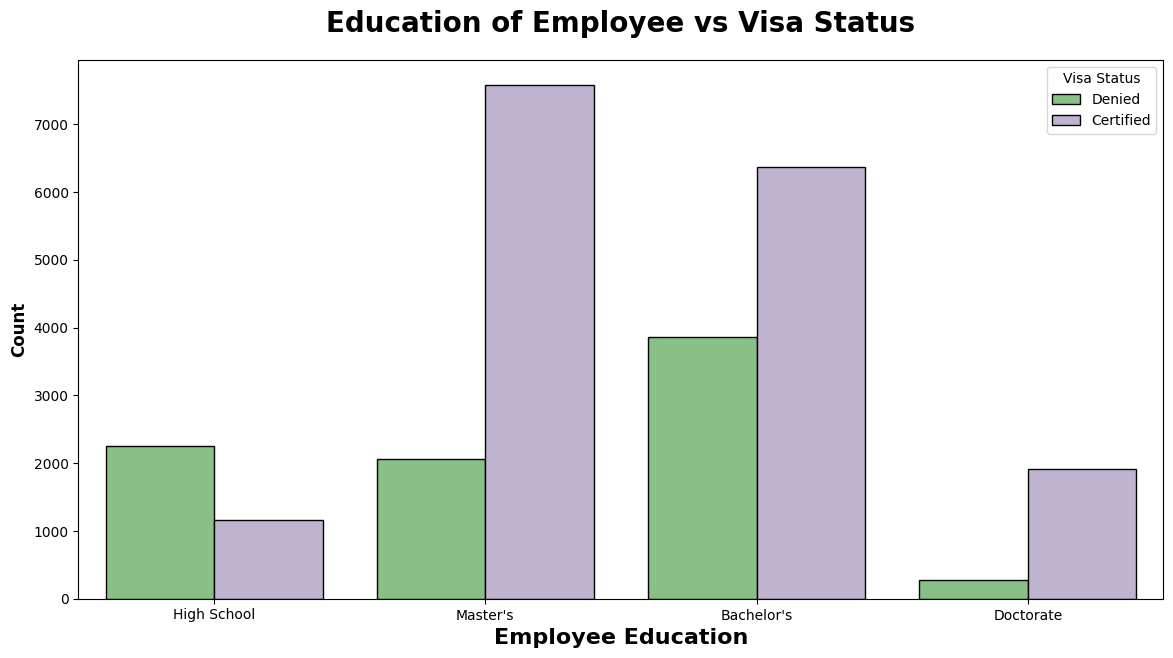

In [26]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Employee Education", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

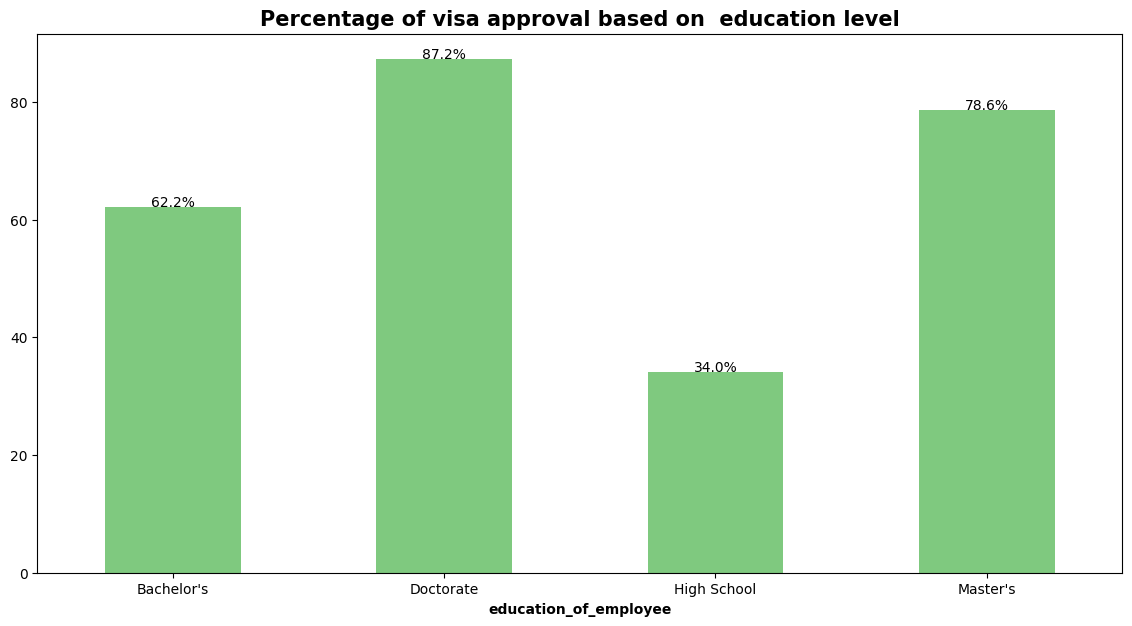

In [27]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of visa approval based on  education level" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Insights

- **Educational Background Plays a Significant Role**  
  Education status demonstrates a strong influence on visa outcomes.

- **Higher Acceptance Rates for Advanced Degrees**  
  Applicants holding a `Doctorate` or `Master's` degree are more likely to have their visa applications approved compared to others.


#### **Does the Applicant's Previous Work Experience Influence Visa Status?**

In [28]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

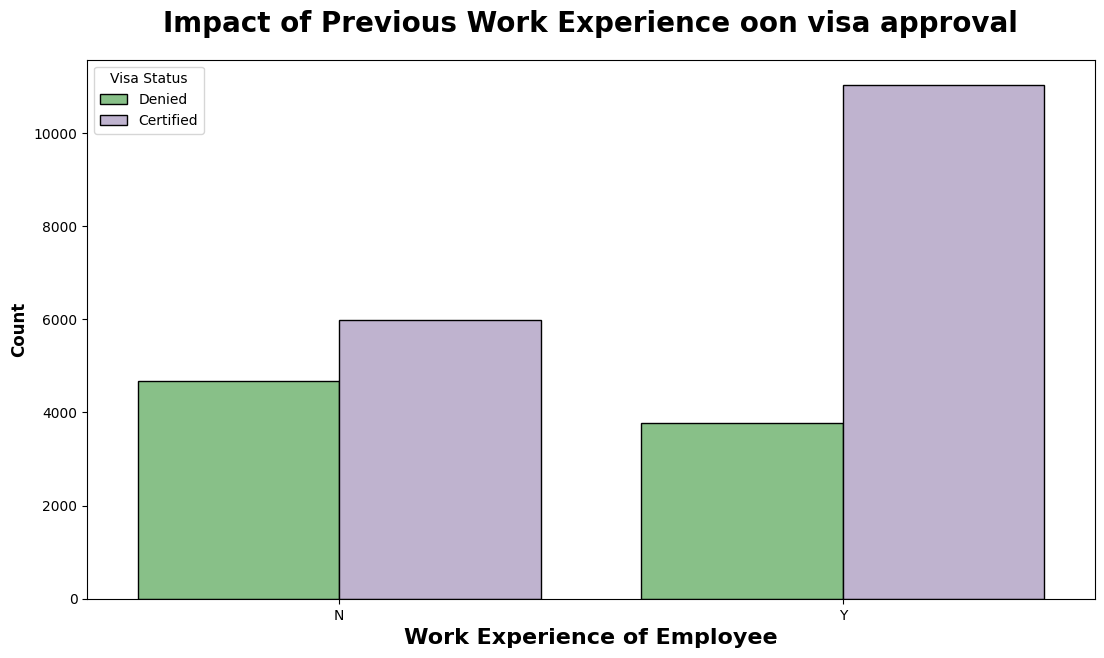

In [29]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Impact of Previous Work Experience oon visa approval", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

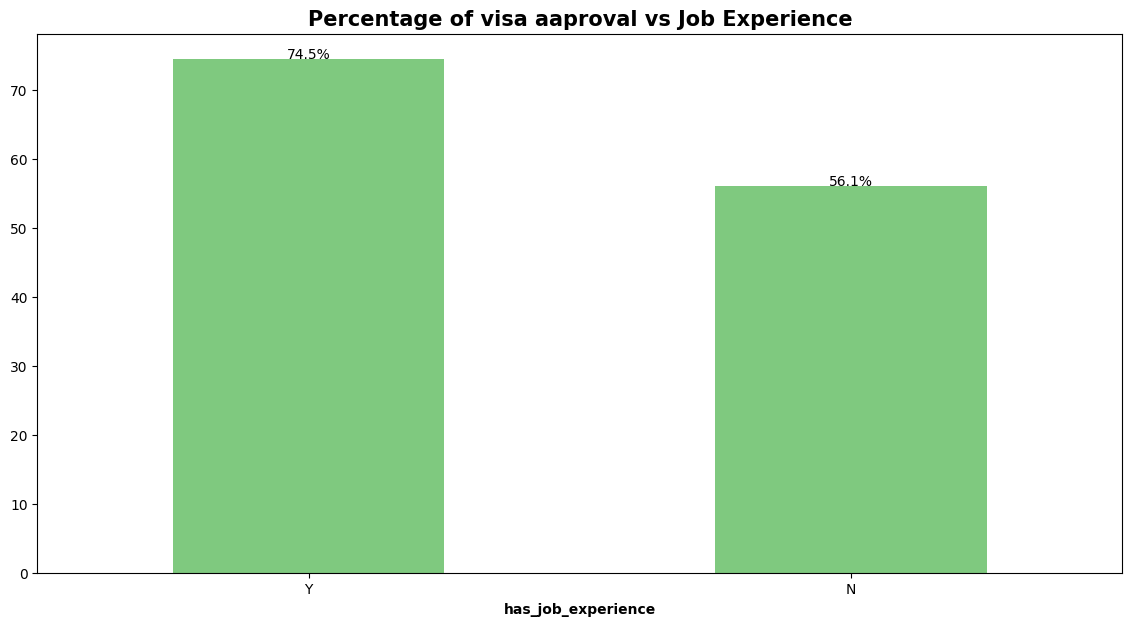

In [30]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of visa aaproval vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Insights 

- **Work Experience and Certification Rates**  
  Applicants with previous work experience have a certification rate of **74.5%**, while **25.5%** of them face denial.

- **Impact on Applicants Without Work Experience**  
  Applicants without prior work experience are certified **56%** of the time, with **43%** being denied.

- **Work Experience as a Factor**  
  Work experience does impact visa status, providing a slight advantage to experienced applicants compared to freshers.

- **Key Observation**  
  While individuals with work experience fare better, the difference in outcomes between experienced and inexperienced applicants is not substantial.


#### **Does Requiring Job Training Influence Visa Status?**

In [31]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

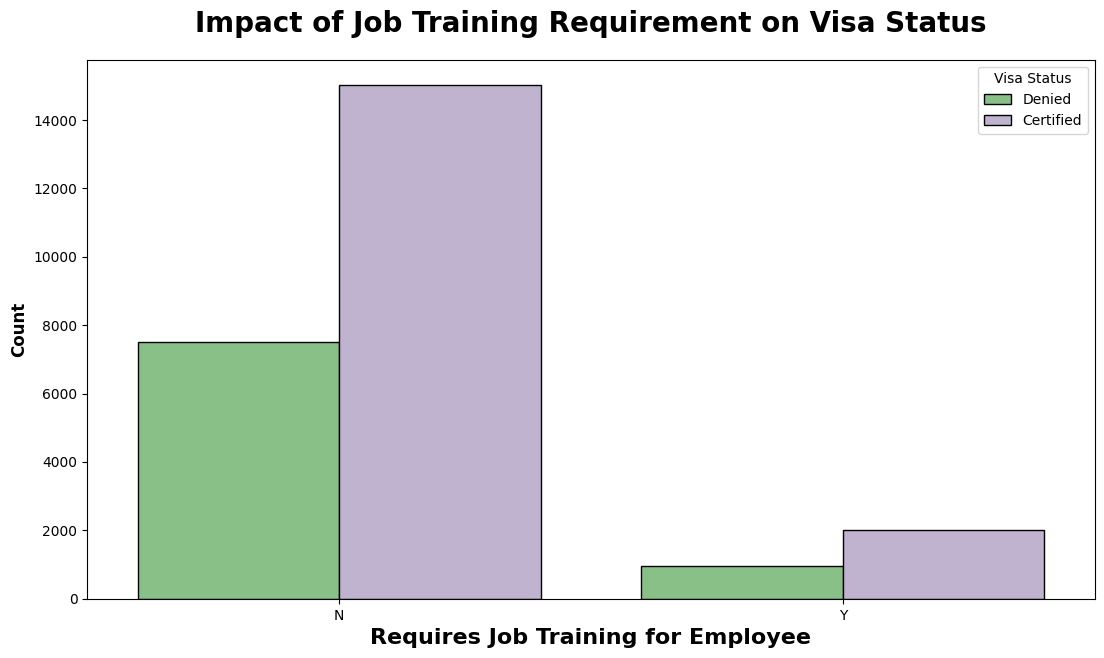

In [32]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Impact of Job Training Requirement on Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

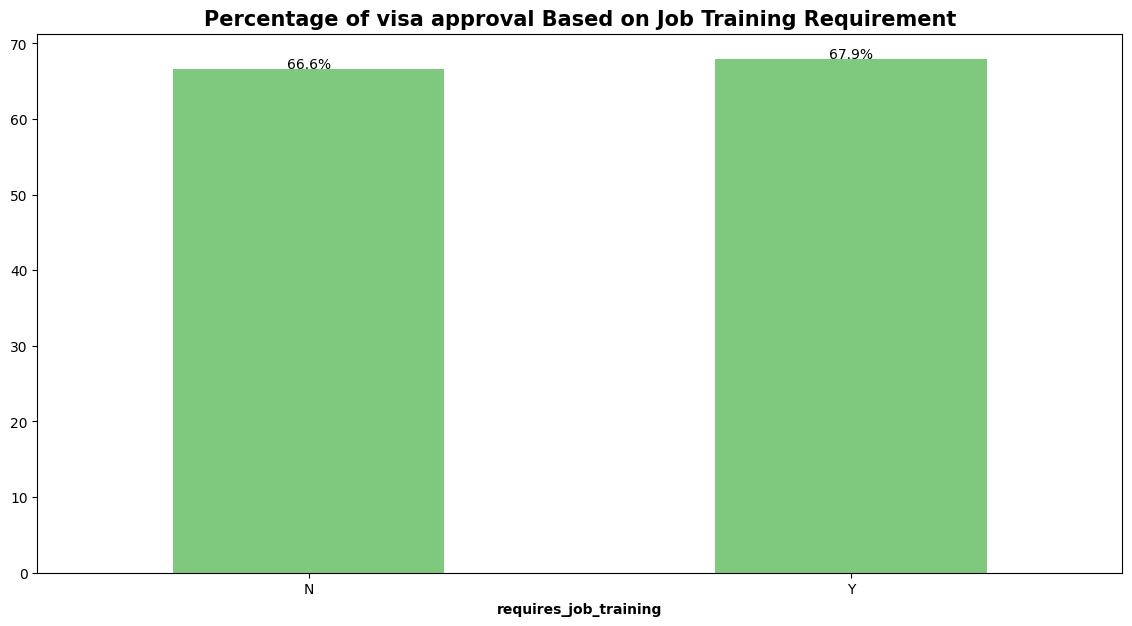

In [33]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of visa approval Based on Job Training Requirement" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Insights 

- **Job Training and Visa Status**  
  Requiring job training does not significantly impact visa status.

- **Majority of Applicants**  
  **88%** of applicants do not require job training.

- **Certification Rates**  
  - Among those not requiring job training, **63%** are certified.  
  - For those requiring job training, **67%** are certified.

- **Key Observation**  
  As confirmed by the Chi-Squared test, this feature has minimal influence on the target variable, which aligns with the observed data from the plot.


####  **Does the number of employees in a company impact the visa status?**
****

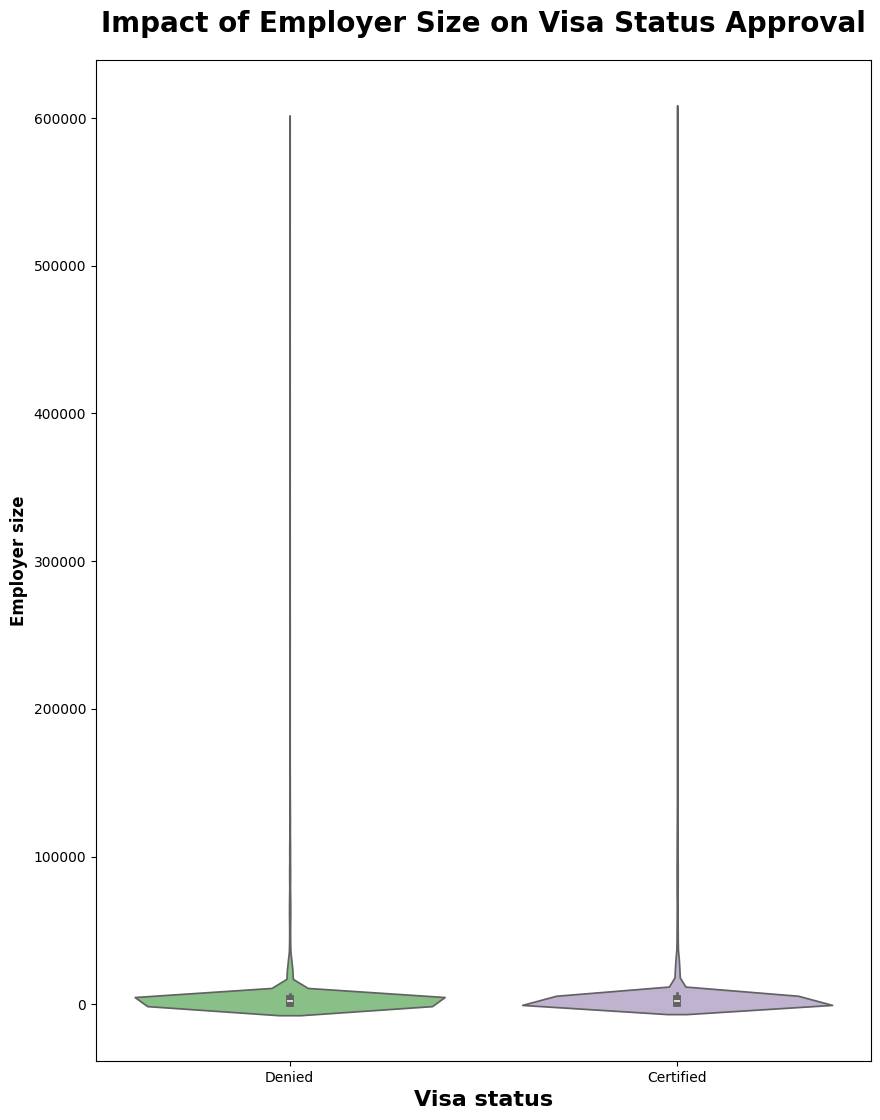

In [34]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Impact of Employer Size on Visa Status Approval", weight="bold",fontsize=20, pad=20)
plt.ylabel("Employer size", weight="bold", fontsize=12)
plt.xlabel("Visa status", weight="bold", fontsize=16)
plt.ylim()
plt.show()

#### Insights
- The distribution of both is similar. However, there are outliers in both classes that need to be handled.


#### **Wage unit and its impact on Visa status**

In [35]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

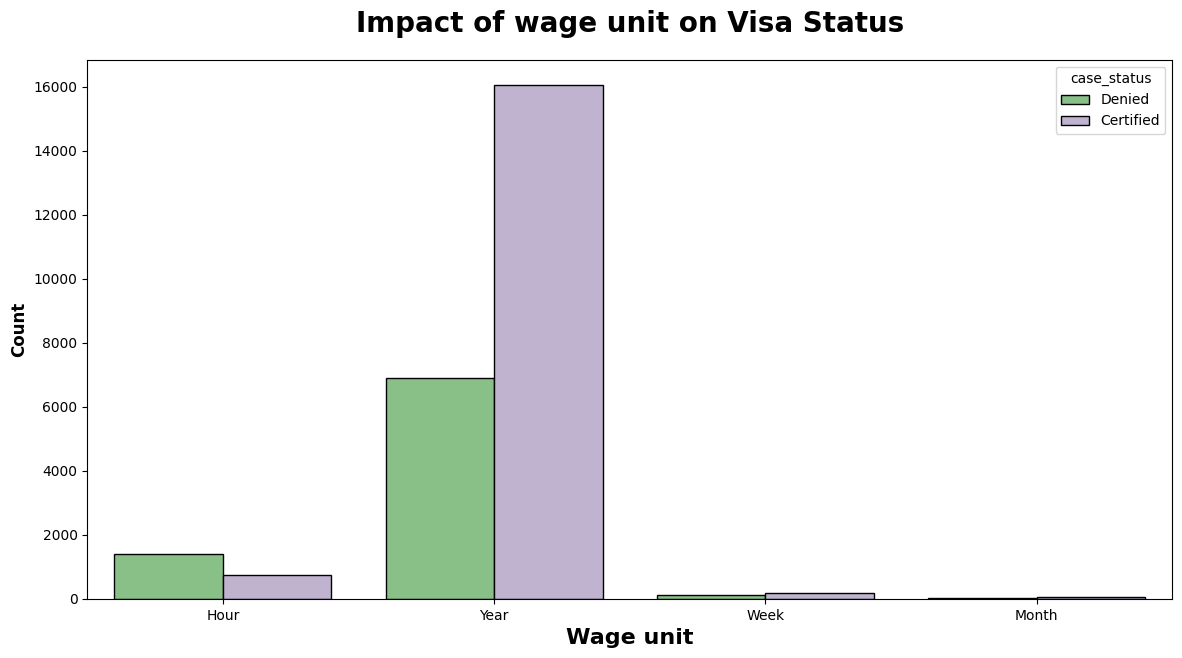

In [36]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("Impact of wage unit on Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Wage unit", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

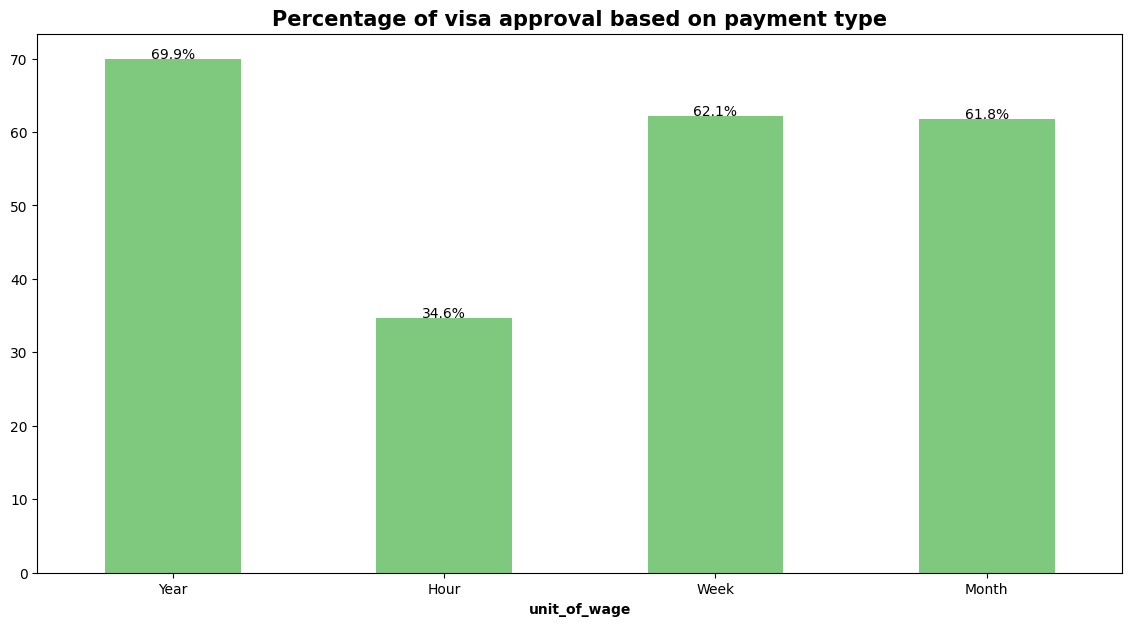

In [37]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of visa approval based on payment type" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### **Insights**
- 65% of employees who applied for hourly pay were denied.
- Yearly wage applications had a 69% acceptance rate and a 31% denial rate.
- Yearly contracts have a higher approval rate compared to others, followed closely by weekly and monthly contracts.


#### **Does Region of employment has impact on Visa status ?**

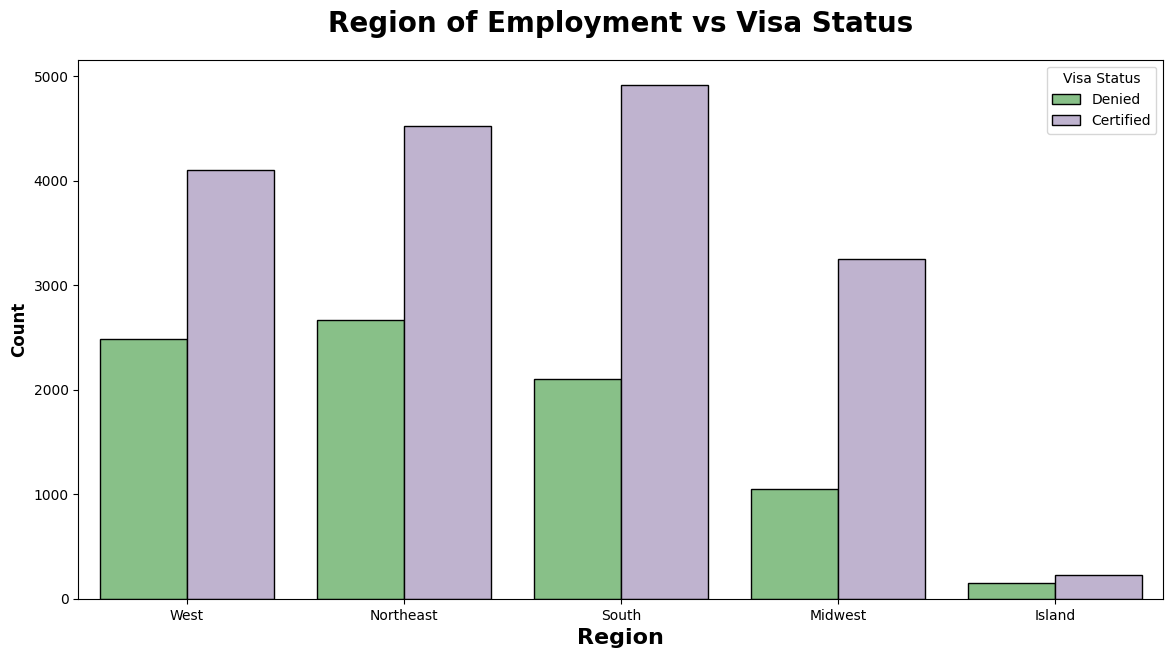

In [38]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k',palette='Accent')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

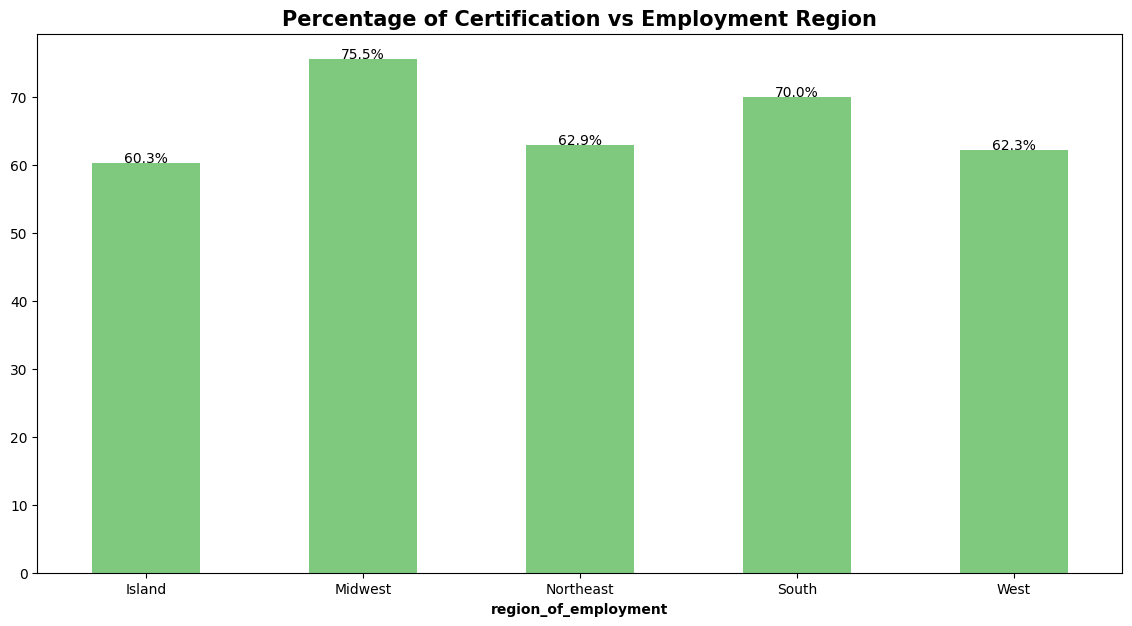

In [39]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certification vs Employment Region", fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### **Insight**
- According to the chart, all regions exhibit a very similar pattern of visa certifications and denials.
- The `Midwest` region has a slight edge, followed by the `South` region.


#### **Does Prevailing wage has any impact on Visa status ?**

In [40]:
df.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

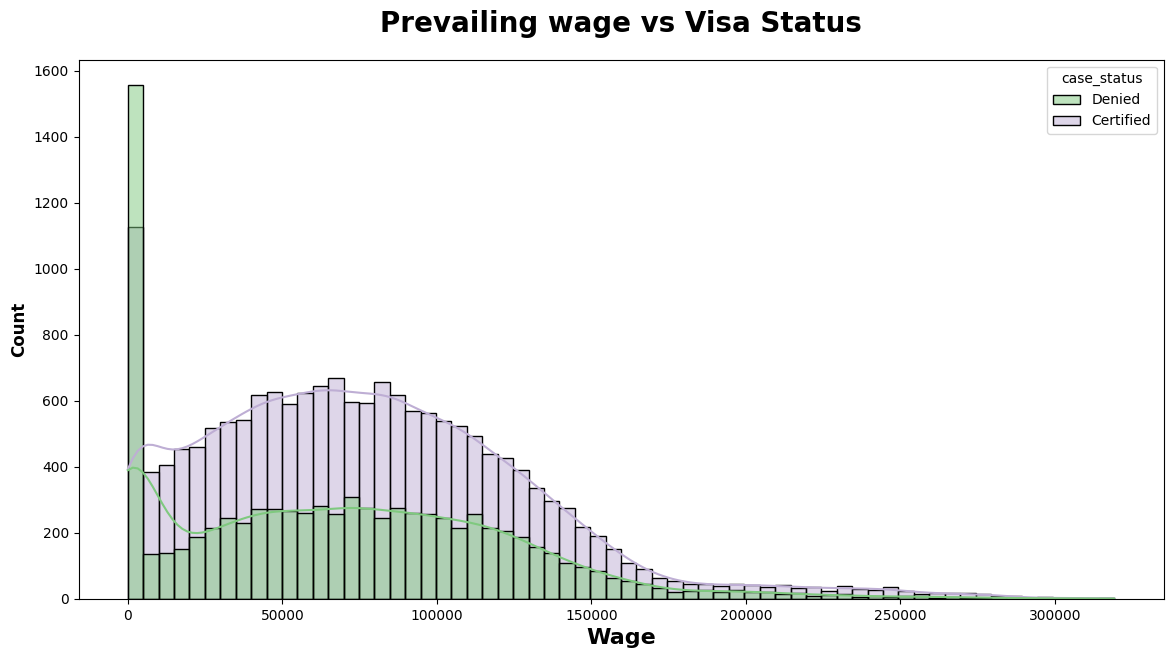

In [41]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True,palette='Accent')
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Wage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
 - The distribution of both the classes are same but need to handel the outliers.

#### Prevailing wage based on Education

In [42]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


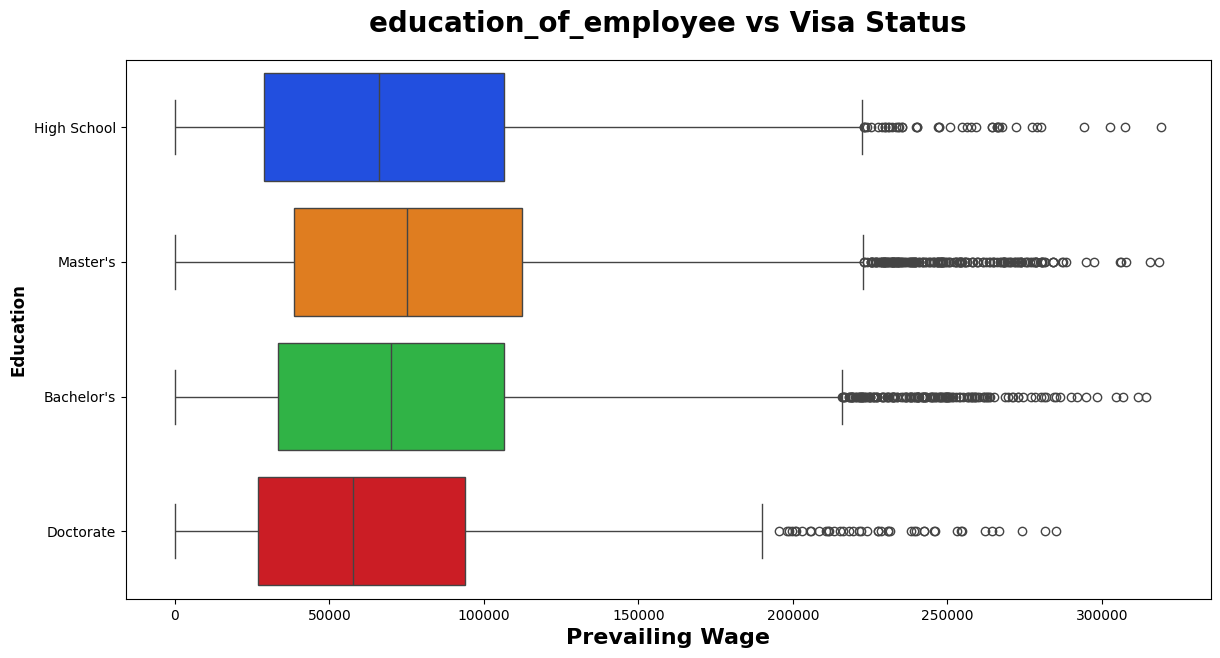

In [43]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

#### **Insight**
- Based on the above table and charts, applicants with a Master's education have higher average prevailing wages.
- Applicants with a Master's education have a median salary of $78.8k, which is approximately 20% higher than the average wage for Doctorate holders, which is unexpected.


#### Prevailing wage based on Job experience

In [44]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


#### **Insight**
- Surprisingly, individuals with less job experience have higher prevailing wages.
- Applicants with no job experience have a median prevailing wage of $72k USD.
- Applicants with previous job experience have a median prevailing wage of $69k USD.


#### Prevailing wage based on Continent

In [45]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


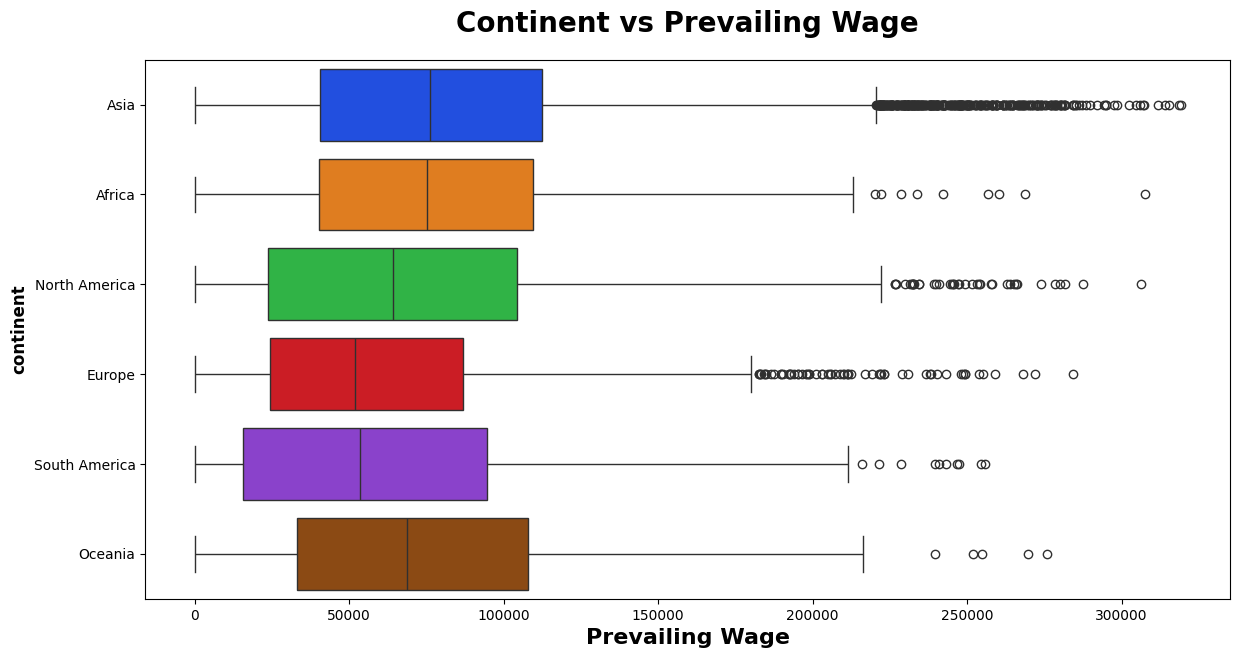

In [46]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("Continent vs Prevailing Wage", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

#### **Insight**
- The average salary of individuals from Asia is higher compared to other continents.


#### **Year of Establishment**

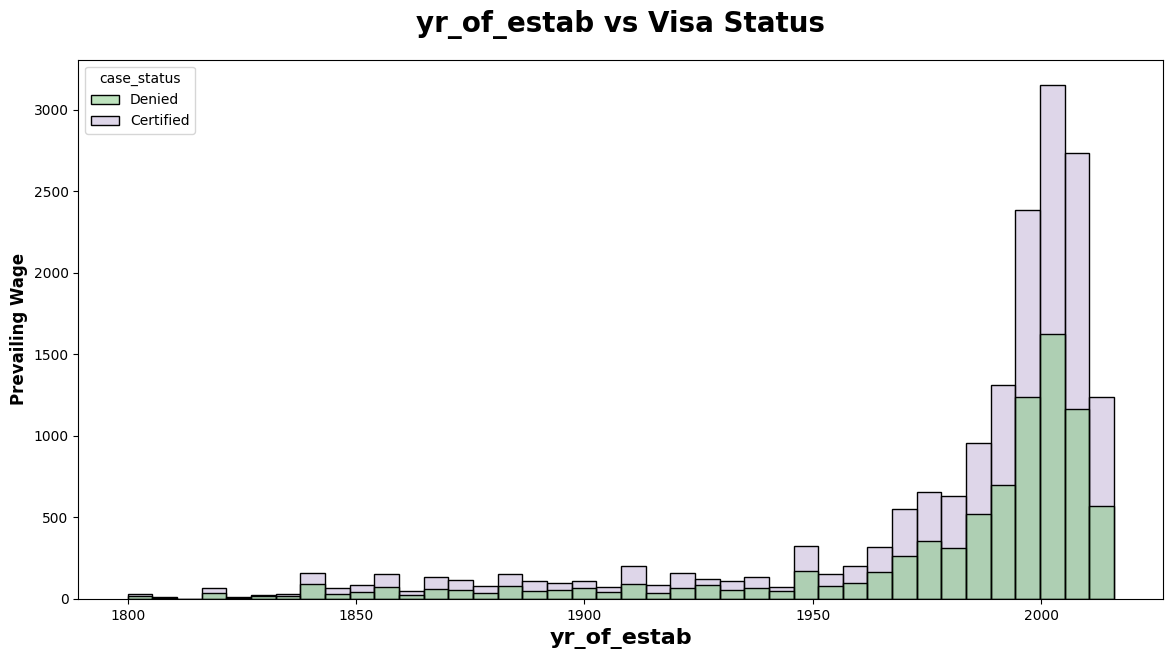

In [47]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='Accent', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

#### **Insights**
- Each bin represents a 5-year period.
- Many companies were established after the year 1950.
- The highest number of company establishments occurred between 2000 and 2005.


### **Conclusion**
- The `case_id` column can be dropped as it serves as an ID.
- The `requires_job_training` column can be dropped since it has minimal impact on the target variable, as shown in the visualizations and chi-square test.
- The `no_of_employees` and `prevailing_wage` columns contain outliers, which should be addressed.
- The `continent` column has a few unique values with very low counts, which can be categorized as **others**.
- The target column `case_status` is imbalanced and should be handled before model building.
